# Red Wine Quality Multiclass Classification
Name: Lina Al Waqfi
#####Student Number: 501279460
##Introduction:
In this project, PyCaret open-source library will be used to perform the classification for red wine quality. Data has been taked from UCI Machine Learning Repository and the link to the source file will be found in the references.
The main challenges in the data processing:
1. Data is not balanced and most of the values are in the 5-7 ranges.
2. Determining the optimal number of categories/bins

The follwing libraries have been used in the model:
1. Pandas
2. Numpy
3. PyCaret
4. Seaborn
5. Matplotlib


The workflow in this project will based on the main workflow for PyCaret as follow:
1. Setup
2. Compare Models
3. Analyze Models
4. Prediction
5. Save Model
6. Deploy Model to Google Cloud

#####However some additional steps that involve pre-processing the data and importing libraries will be intergrated within the workflow


## 1. Installating and Importing Libraries

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Importing Data and Overview

2.1 The data has been imported from the source link, unzipped, and a delimeter ";" has been identified as the seperator to covert it to a tabular format. The tables below show the feature columns along with more details on the values of the target column "Quality". The next steps are to check for missing values and duplicates. Quality has been changed to category and checked for data imbalance

In [ ]:
#import the data set directly from the source file
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip -O wine.zip
!unzip -q wine.zip

In [ ]:
data = pd.read_csv('winequality-red.csv' , delimiter=";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

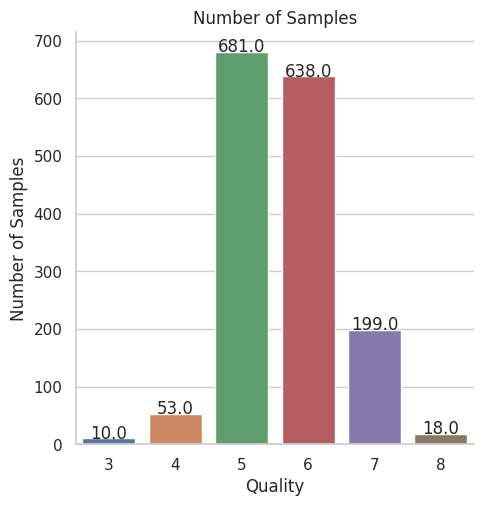

In [ ]:
# Catplot visualization to demonstrate the count
sns.set(style="whitegrid")
g = sns.catplot(x='quality', data=data, kind='count', palette='deep')

ax = g.ax
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title("Number of Samples")
plt.xlabel("Quality")
plt.ylabel("Number of Samples")

# Show the plot
plt.show()


In [ ]:
data.shape

(1599, 12)

##### There is one element in the DataFrame for each row, and the DataFrame is not empty as shown below

In [ ]:
len(data) == data.shape[0]

True

In [ ]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


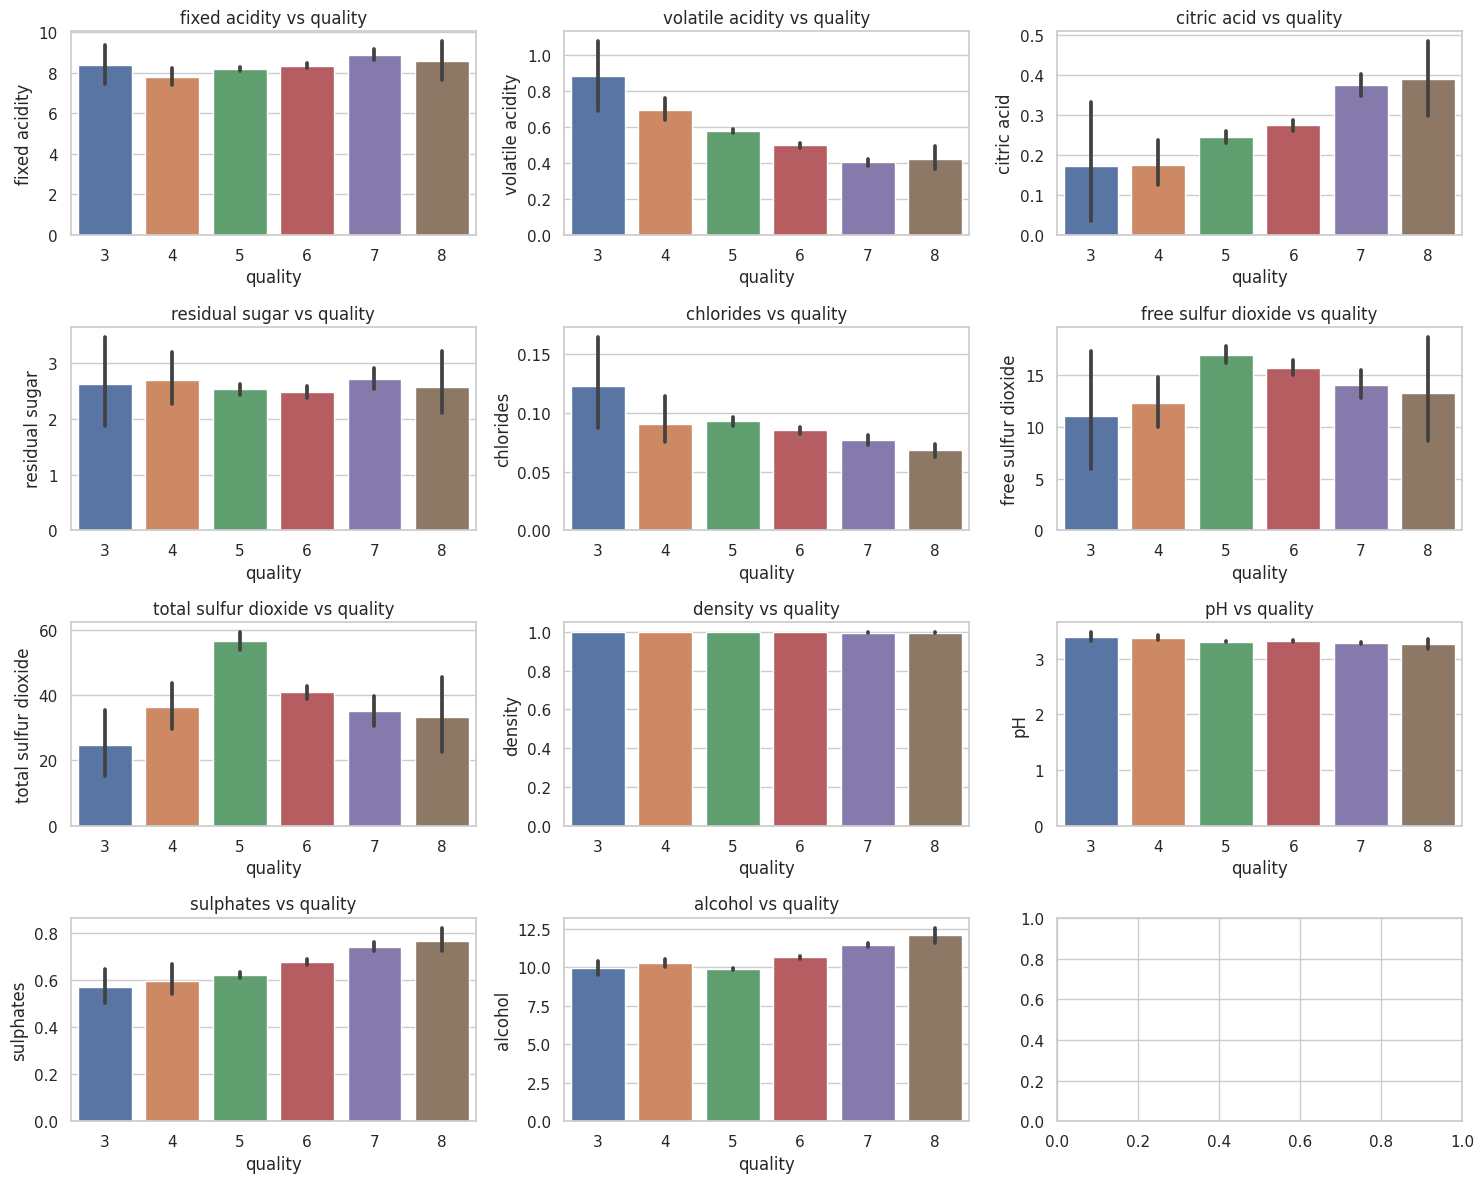

In [ ]:
# The features to visualize
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    sns.barplot(x='quality', y=feature, data=data, ax=axes[i])
    axes[i].set_xlabel('quality')
    axes[i].set_ylabel(feature)
    axes[i].set_title(f'{feature} vs quality')

plt.tight_layout()

plt.show()

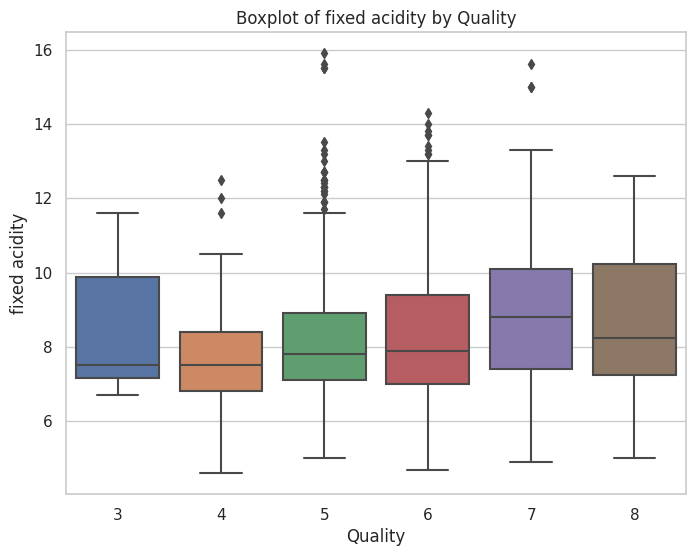

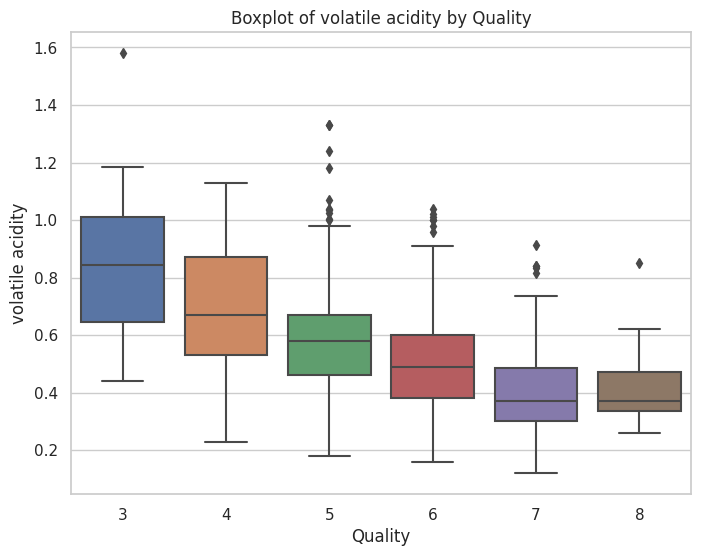

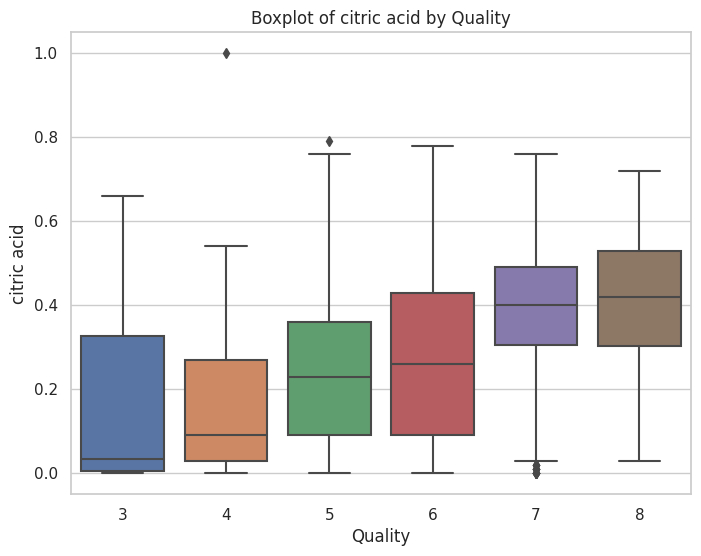

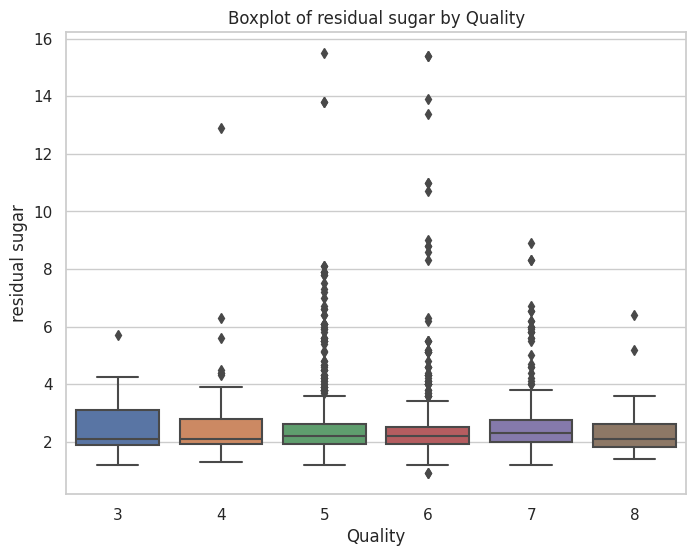

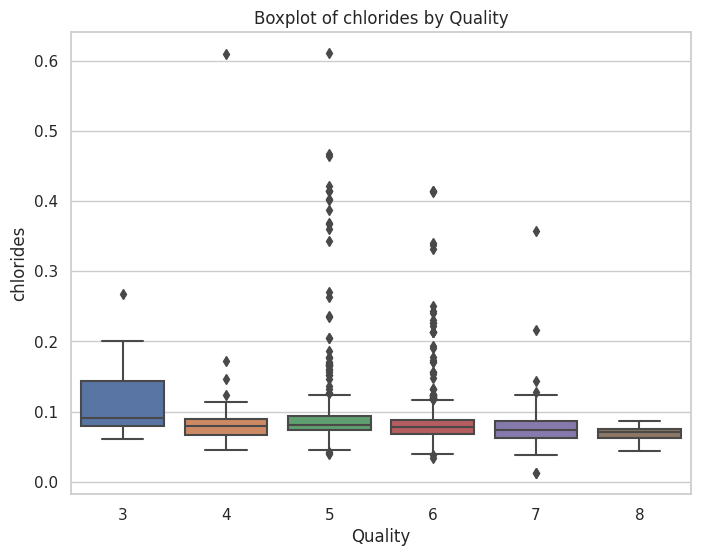

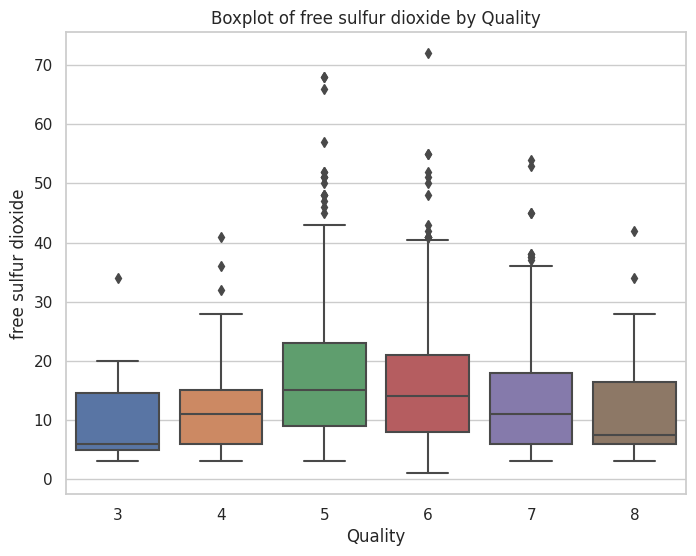

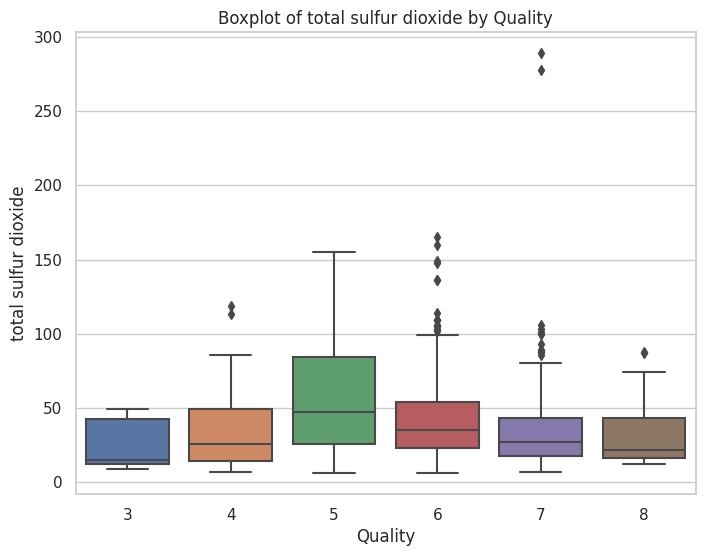

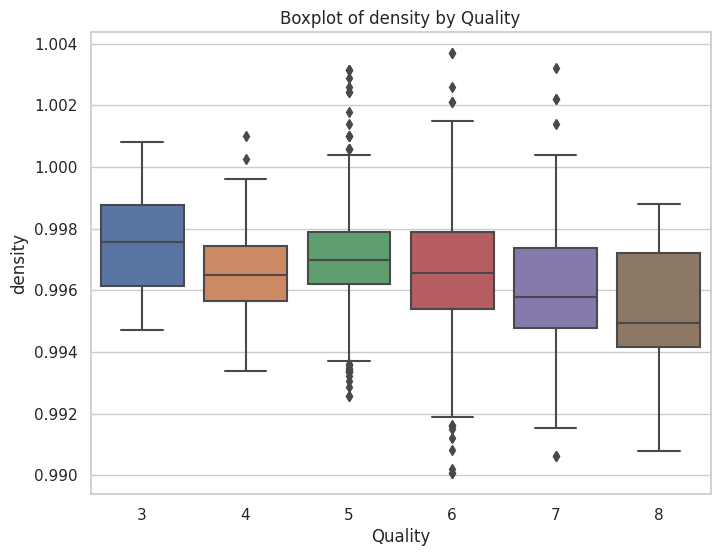

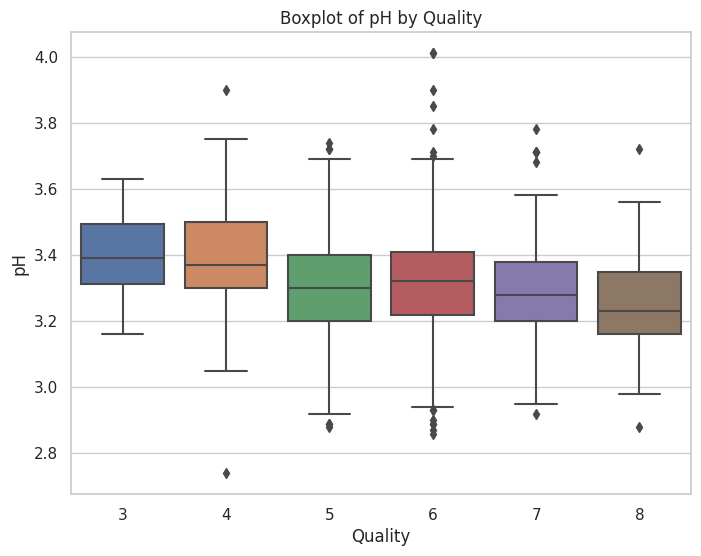

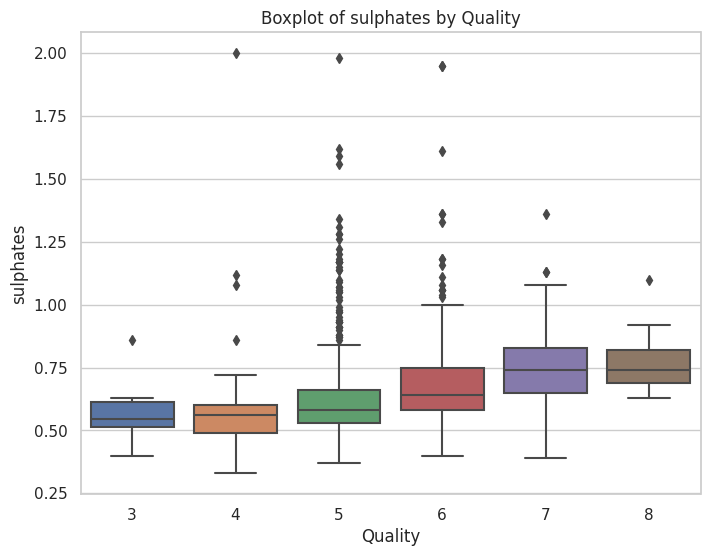

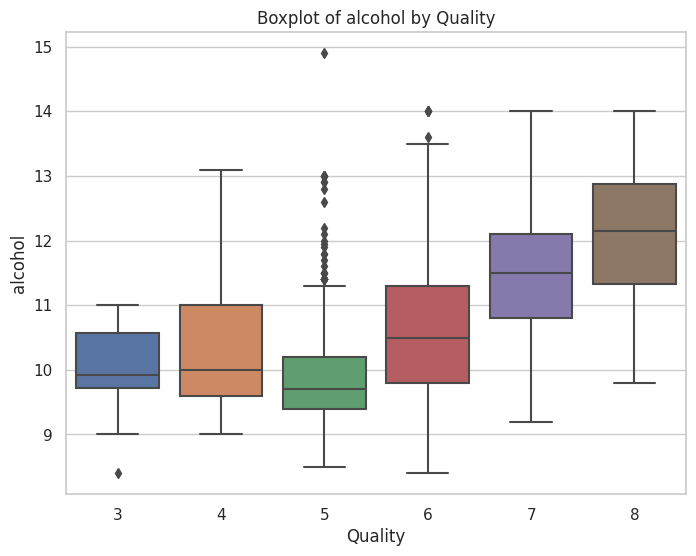

In [ ]:
 # The below graph shows boxplot grouped by 'quality'
    for label in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='quality', y=label, data=data)
    plt.title(f'Boxplot of {label} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(label)
    plt.show()


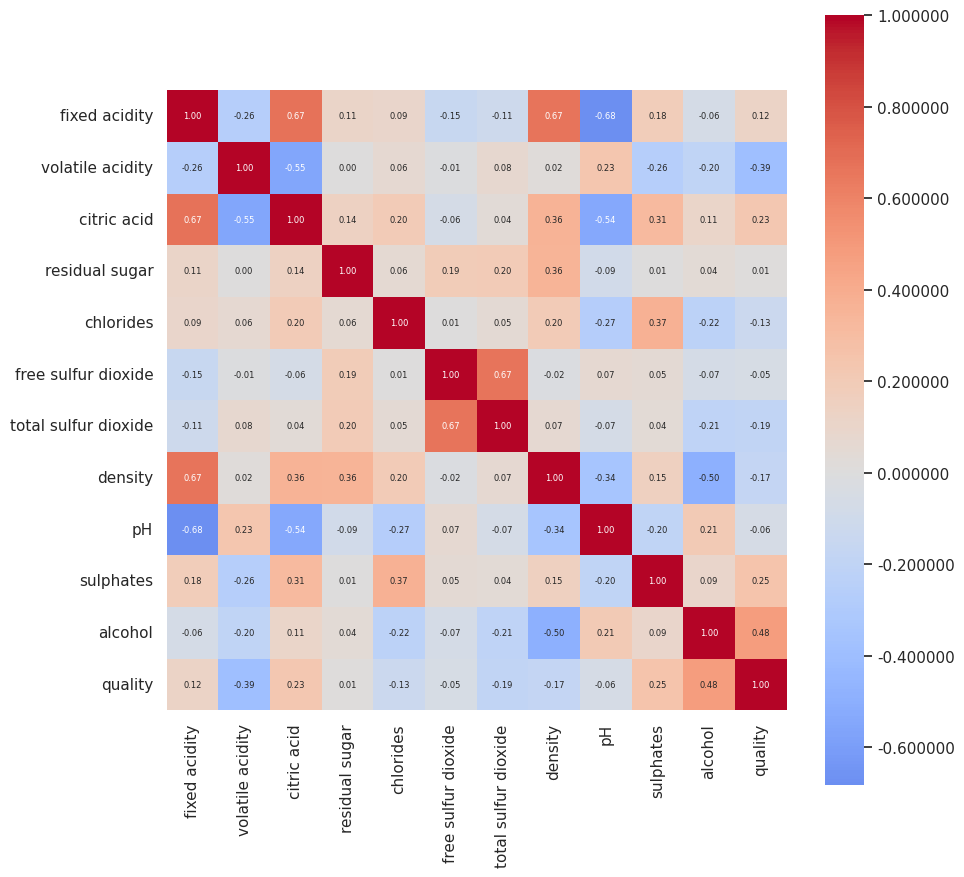

In [ ]:
# The correlation matrix
correlation = data.corr()

# Set the colormap to 'coolwarm'
cmap = 'coolwarm'

# Create the heatmap with the adjusted colormap and centered color scale
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 6}, cmap=cmap, center=0, cbar_kws={'format': '%1f'})
plt.show()



In [ ]:
# Check for missing values- as we can see below, there are no missing values in the dataset
missing_values = data.isnull().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
# Convert quality to category type
data['quality'] = data['quality'].astype('category')


# 3. PyCaret Setup
#####This function initializes the training environment and creates the transformation pipeline. The high imbalance in data has been fixed by oversampling the minority as the other two groups are almost equal in size and have no issues. The test dataset account for 22% of the overall dataset. Given the small size of the data, this % seems to be reasonable.

In [ ]:
print(data.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
from imblearn.over_sampling import *
adasyn1 = ADASYN(sampling_strategy='minority')

In [ ]:
# import pycaret classification and init setup, the train size has chosedn to be 0.8 due to small data size
from pycaret.classification import *
s= setup(data, target = 'quality', session_id=177, log_experiment=False,
                  experiment_name='wine_q2', normalize=True, normalize_method='zscore',
                  transformation=True, transformation_method = 'quantile', fix_imbalance=True,
                  fix_imbalance_method= adasyn1)

,Description,Value
0,Session id,177
1,Target,quality
2,Target type,Multiclass
3,Target mapping,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original data shape,"(1599, 12)"
5,Transformed data shape,"(2068, 12)"
6,Transformed train set shape,"(1588, 12)"
7,Transformed test set shape,"(480, 12)"
8,Numeric features,11
9,Preprocess,True


In [ ]:
# check the type of exp
type(s)

pycaret.classification.oop.ClassificationExperiment

## 4. Compare Models

Compare models is a convenient way to quickly assess the performance of different models without manually training and evaluating each one

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.6470,0.5697,0.6470,0.6379,0.6373,0.4381,0.4411,0.7440
catboost,CatBoost Classifier,0.6462,0.5704,0.6462,0.6276,0.6322,0.4308,0.4337,18.9150
rf,Random Forest Classifier,0.6417,0.5728,0.6417,0.6201,0.6234,0.4181,0.4228,0.6330
et,Extra Trees Classifier,0.6390,0.5750,0.6390,0.6207,0.6206,0.4119,0.4171,0.3450
lightgbm,Light Gradient Boosting Machine,0.6354,0.5639,0.6354,0.6104,0.6192,0.4139,0.4173,3.4940
gbc,Gradient Boosting Classifier,0.6274,0.5452,0.6274,0.6157,0.6181,0.4077,0.4100,3.1620
qda,Quadratic Discriminant Analysis,0.5648,0.5067,0.5648,0.5551,0.5577,0.3193,0.3207,0.1640
lr,Logistic Regression,0.5559,0.5186,0.5559,0.5671,0.5524,0.3050,0.3100,1.1690
lda,Linear Discriminant Analysis,0.5532,0.5210,0.5532,0.5772,0.5604,0.3225,0.3263,0.1080
dt,Decision Tree Classifier,0.5523,0.4565,0.5523,0.5704,0.5571,0.3123,0.3142,0.1240


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

## 5. Running and Tunning the Models

Based on the comparison of different models, I have selected Extra Tree Classifier for deployment on cloud because it gave me the highest AUC

In [ ]:
# Extra Trees Classifier
extra_trees_model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6518,0.8080,0.6518,0.6268,0.6372,0.4467,0.4495
1,0.6786,0.8579,0.6786,0.6588,0.6629,0.4845,0.4894
2,0.6607,0.8343,0.6607,0.6316,0.6400,0.4444,0.4482
3,0.5893,0.8084,0.5893,0.5876,0.5777,0.3316,0.3352
4,0.6339,0.7952,0.6339,0.5997,0.6021,0.3940,0.4010
5,0.6518,0.8257,0.6518,0.6310,0.6325,0.4332,0.4390
6,0.6250,0.0000,0.6250,0.5997,0.6081,0.3977,0.4022
7,0.6875,0.0000,0.6875,0.6606,0.6674,0.4848,0.4902
8,0.6786,0.0000,0.6786,0.6636,0.6564,0.4669,0.4734


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# Tune the hyperparameters of the Extra Trees Classifier
tuned_et_model = tune_model(extra_trees_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5536,0.7537,0.5536,0.4821,0.5134,0.2659,0.2747
1,0.6429,0.7885,0.6429,0.5657,0.5963,0.4197,0.4336
2,0.5893,0.7699,0.5893,0.5344,0.5542,0.3365,0.3467
3,0.4911,0.6727,0.4911,0.4300,0.4585,0.1706,0.1749
4,0.5625,0.7446,0.5625,0.4756,0.5134,0.2778,0.2856
5,0.5625,0.7145,0.5625,0.4960,0.5268,0.2881,0.2955
6,0.5714,0.0000,0.5714,0.5168,0.5401,0.3090,0.3190
7,0.5714,0.0000,0.5714,0.4918,0.5286,0.2847,0.2925
8,0.5446,0.0000,0.5446,0.4818,0.5046,0.2595,0.2715


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


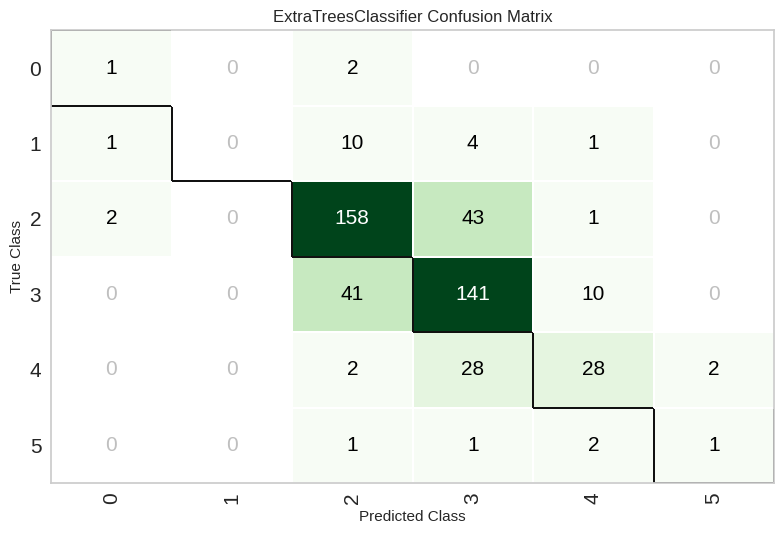

In [ ]:
# plot confusion matrix
plot_model(extra_trees_model, plot = 'confusion_matrix')

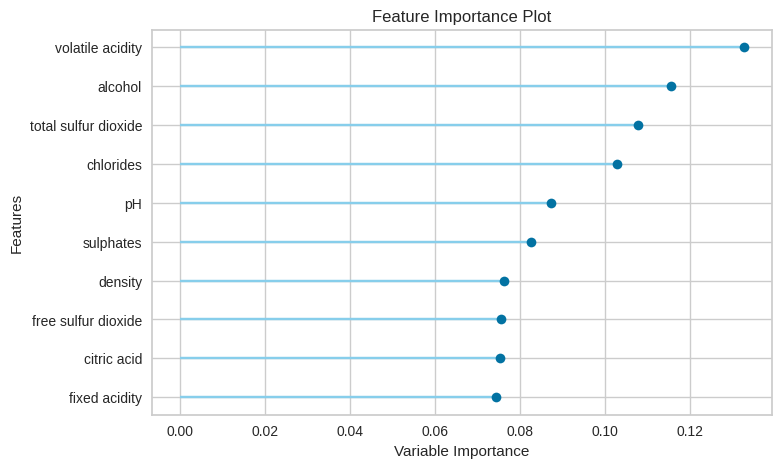

In [ ]:
# plot feature importance
plot_model(extra_trees_model, plot = 'feature')

In [ ]:
# check docstring to see available plots
help(plot_model)

Help on function plot_model in module pycaret.classification.functional:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Optional[dict] = None, plot_kwargs: Optional[dict] = None, groups: Union[str, Any, NoneType] = None, verbose: bool = True, display_format: Optional[str] = None) -> Optional[str]
    This function analyzes the performance of a trained model on holdout set.
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'pipeline'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create directory on google drive to save models locally. You can use temp paths.
import os
model_dir = '/content/drive/My Drive/gcp_deploy_model/'
os.makedirs(model_dir, exist_ok=True)

In [ ]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
#check the shape of data
data.shape

(1599, 12)

In [ ]:
data1 = data.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data1.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data1.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1439, 12)
Unseen Data For Predictions: (160, 12)


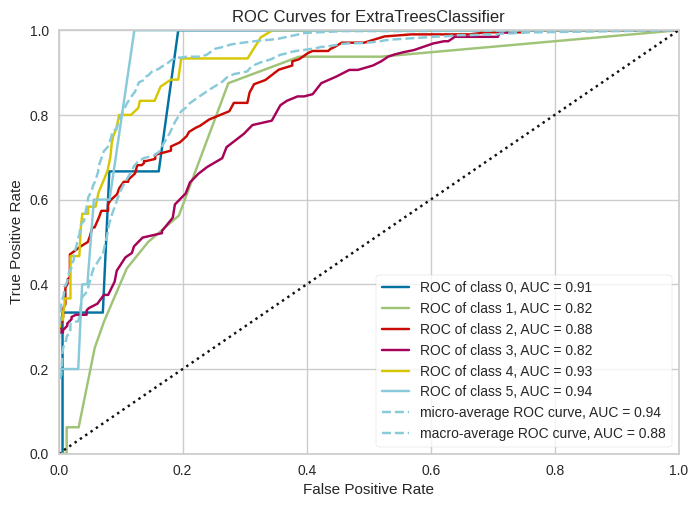

In [ ]:
plot_model(tuned_et_model)

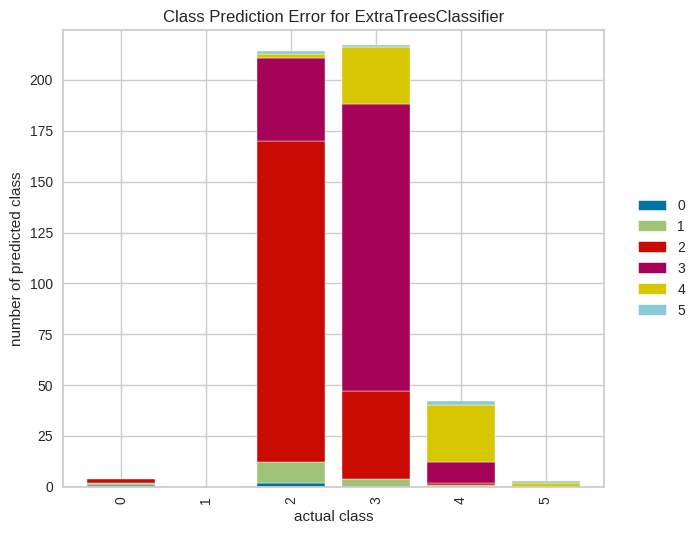

In [ ]:
plot_model(tuned_et_model, plot = 'error')

In [ ]:
predict_model(tuned_et_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.6854,0.8612,0.6854,0.6621,0.6701,0.4915,0.4942


In [ ]:
final_et = finalize_model(tuned_et_model)

In [ ]:
print(final_et)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='sqrt',
                                   

In [ ]:
predict_model(final_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
21,7.6,0.390,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5,5,0.82
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,6,0.86
833,11.6,0.470,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4,4,0.64
887,10.7,0.520,0.38,2.6,0.066,29.0,56.0,0.99577,3.15,0.79,12.1,7,7,0.82
640,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4,5,5,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,8.6,0.520,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5,5,0.80
1288,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5,5,0.90
35,7.8,0.645,0.00,5.5,0.086,5.0,18.0,0.99860,3.40,0.55,9.6,6,6,0.58
1533,8.0,0.390,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,5,5,0.80


In [ ]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.3,0.670,0.02,2.20,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,6,1.0
1,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.300000,7,7,1.0
2,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6,6,1.0
3,6.9,0.630,0.02,1.90,0.078,18.0,30.0,0.99712,3.40,0.75,9.800000,5,5,1.0
4,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.700000,5,5,1.0


In [ ]:
model_dir
model_name = 'Final_et_model'

In [ ]:
save_model(final_et, model_dir + model_name)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight=None, criterion='gini',
                                       max_depth=None, max_features='sqrt',
                    

In [ ]:
saved_final_et = load_model(model_dir + model_name)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
new_prediction.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.3,0.670,0.02,2.20,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,6,1.0
1,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.300000,7,7,1.0
2,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6,6,1.0
3,6.9,0.630,0.02,1.90,0.078,18.0,30.0,0.99712,3.40,0.75,9.800000,5,5,1.0
4,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.700000,5,5,1.0


## Deployment

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
# GCP project name, Change the name based on your own GCP project.
CLOUD_PROJECT = 'proud-maker-406414'  # GCP project name
bucket_name = '1googlcloud1'  # bucket name for storage of your model
BUCKET = 'gs://' + CLOUD_PROJECT + '-' + bucket_name
# Set the gcloud console to $CLOUD_PROJECT Environment Variable for your Desired Project)
!gcloud config set project $CLOUD_PROJECT

Updated property [core/project].


In [ ]:
from google.cloud import storage

def create_bucket(project_name, bucket_name):
    """Creates a new bucket."""
    # bucket_name = "your-new-bucket-name"

    storage_client = storage.Client(project_name)

    buckets = storage_client.list_buckets()

    if bucket_name not in buckets:
      bucket = storage_client.create_bucket(bucket_name)
      print("Bucket {} created".format(bucket.name))
    else:
      raise FileExistsError('{} already exists'.format(bucket_name))


def upload_blob(project_name, bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # bucket_name = "your-bucket-name"
    # source_file_name = "local/path/to/file"
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client(project_name)
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        "File {} uploaded to {}.".format(
            source_file_name, destination_blob_name
        )
    )

def download_blob(project_name, bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # bucket_name = "your-bucket-name"
    # source_blob_name = "storage-object-name"
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client(project_name)

    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(source_blob_name)

    if destination_file_name is not None:
      blob.download_to_filename(destination_file_name)

      print(
          "Blob {} downloaded to {}.".format(
              source_blob_name, destination_file_name
          )
      )


    return blob

In [ ]:
# Save Model Local/google drive and upload to GCP
model_name_gcp = 'et-reg101-gcp'
save_model(final_et, model_name= model_dir + model_name_gcp, verbose=False)
model_src = model_dir + model_name_gcp +'.pkl'
model_dst = str(model_name)+'.pkl'

In [ ]:
upload_blob(CLOUD_PROJECT, bucket_name, model_src, model_dst)

File /content/drive/My Drive/gcp_deploy_model/et-reg101-gcp.pkl uploaded to Final_et_model.pkl.


In [ ]:
outfile_name = model_dir + 'et-reg101-gcp-downloaded'
model_gcp_src = str(model_name)+'.pkl'
model_downloaded = download_blob(CLOUD_PROJECT, bucket_name, model_gcp_src, outfile_name + '.pkl')

Blob Final_et_model.pkl downloaded to /content/drive/My Drive/gcp_deploy_model/et-reg101-gcp-downloaded.pkl.


In [ ]:
os.listdir(model_dir)

['Final_et_model.pkl', 'et-reg101-gcp.pkl', 'et-reg101-gcp-downloaded.pkl']

In [ ]:
# Loading the model for predictions
gcp_final_et = load_model(outfile_name)

Transformation Pipeline and Model Successfully Loaded


In [ ]:
# Predictions from deployed model
new_prediction_gcp = predict_model(gcp_final_et, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
new_prediction_gcp.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction_label,prediction_score
0,7.3,0.670,0.02,2.20,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,6,1.0
1,7.2,0.370,0.32,2.00,0.062,15.0,28.0,0.99470,3.23,0.73,11.300000,7,7,1.0
2,7.4,0.785,0.19,5.20,0.094,19.0,98.0,0.99713,3.16,0.52,9.566667,6,6,1.0
3,6.9,0.630,0.02,1.90,0.078,18.0,30.0,0.99712,3.40,0.75,9.800000,5,5,1.0
4,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.99322,3.38,0.49,11.700000,5,5,1.0
